# Notebook 05 - Decision Tree vs NN Evaluation

In [21]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve


Load dataset and preprocess

In [22]:
data_path = r"C:/Users/USER/PycharmProjects/ML/data/Telco-Customer-Churn.csv"
df = pd.read_csv(data_path)

# Drop ID column and convert TotalCharges to numeric
df = df.drop("customerID", axis=1)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())

# Encode target
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

# Features and labels
X = df.drop("Churn", axis=1)
y = df["Churn"]

# Load preprocessor
preprocessor = joblib.load("results/preprocessor.pkl")
X_pre = preprocessor.transform(X)


Define build_nn before loading

In [23]:

def build_nn(input_dim, hidden_units=16):
    model = Sequential()
    model.add(Dense(hidden_units, activation='relu', input_dim=input_dim))
    model.add(Dense(hidden_units, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


Load Saved Models

In [24]:
dt_clf = joblib.load("results/decision_tree_model.pkl")
nn_clf = joblib.load("results/nn_model.pkl")
print("Models loaded successfully.")


Models loaded successfully.


Predictions

In [25]:
# Decision Tree
y_pred_dt = dt_clf.predict(X_pre)

# Neural Network
y_pred_nn_prob = nn_clf.predict(X_pre)
y_pred_nn = (y_pred_nn_prob > 0.5).astype(int)


Accuracy & Classification Reports

In [26]:
# Decision Tree
print("Decision Tree Accuracy:", accuracy_score(y, y_pred_dt))
print("\nDecision Tree Classification Report:\n", classification_report(y, y_pred_dt))

# Neural Network
print("Neural Network Accuracy:", accuracy_score(y, y_pred_nn))
print("\nNeural Network Classification Report:\n", classification_report(y, y_pred_nn))


Decision Tree Accuracy: 0.8064745137015477

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      5174
           1       0.69      0.49      0.58      1869

    accuracy                           0.81      7043
   macro avg       0.76      0.71      0.73      7043
weighted avg       0.80      0.81      0.80      7043

Neural Network Accuracy: 0.8132897912821241

Neural Network Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.81      0.86      5174
           1       0.61      0.83      0.70      1869

    accuracy                           0.81      7043
   macro avg       0.77      0.82      0.78      7043
weighted avg       0.84      0.81      0.82      7043



Confusion matrices

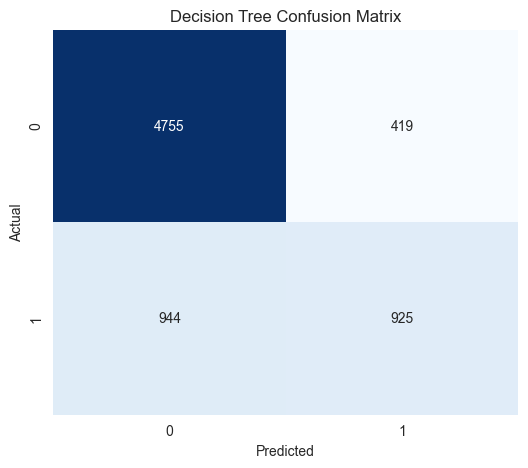

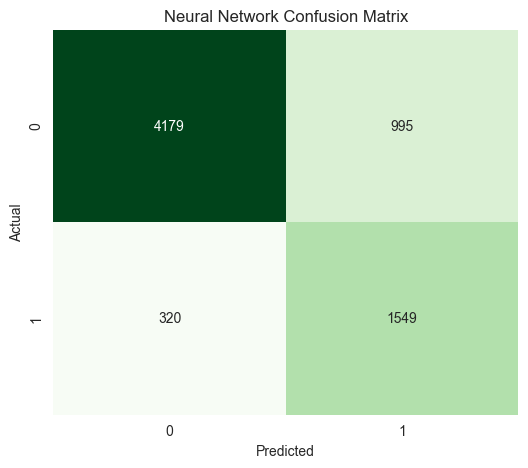

In [27]:
# Decision Tree
cm_dt = confusion_matrix(y, y_pred_dt)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Neural Network
cm_nn = confusion_matrix(y, y_pred_nn)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Neural Network Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


ROC AUC and Curves

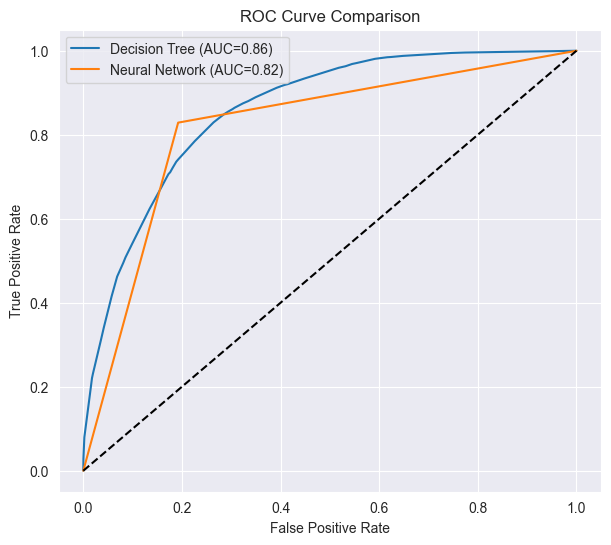

In [29]:
# Decision Tree
dt_auc = roc_auc_score(y, dt_clf.predict_proba(X_pre)[:,1])
fpr_dt, tpr_dt, _ = roc_curve(y, dt_clf.predict_proba(X_pre)[:,1])

# Neural Network
nn_auc = roc_auc_score(y, y_pred_nn_prob)
fpr_nn, tpr_nn, _ = roc_curve(y, y_pred_nn_prob)

plt.figure(figsize=(7,6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC={dt_auc:.2f})')
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC={nn_auc:.2f})')
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


Summary

In [30]:
summary = pd.DataFrame({
    'Model': ['Decision Tree', 'Neural Network'],
    'Accuracy': [accuracy_score(y, y_pred_dt), accuracy_score(y, y_pred_nn)],
    'ROC AUC': [dt_auc, nn_auc]
})
summary


,Model,Accuracy,ROC AUC
0,Decision Tree,0.806475,0.859334
1,Neural Network,0.813290,0.818239
